In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# çalıştığımız grafiği her seferinde manuel olarak değil de ilk başta otomatik olarak da boyutlarını ayarlayabiliriz.
plt.rcParams["figure.figsize"] = (10, 6) #grafik büyüklüğü
plt.rcParams["xtick.labelsize"] = 14 # x grafiğinin yazı boyutu
plt.rcParams["ytick.labelsize"] = 14 # y frafiğinin yazı boyutu

plt.rcParams["axes.labelsize"] = 16 


In [11]:
data = sns.load_dataset("penguins")
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
data[data["sex"] == "Male"]["flipper_length_mm"]


# Seaborn Olmadan Histogram


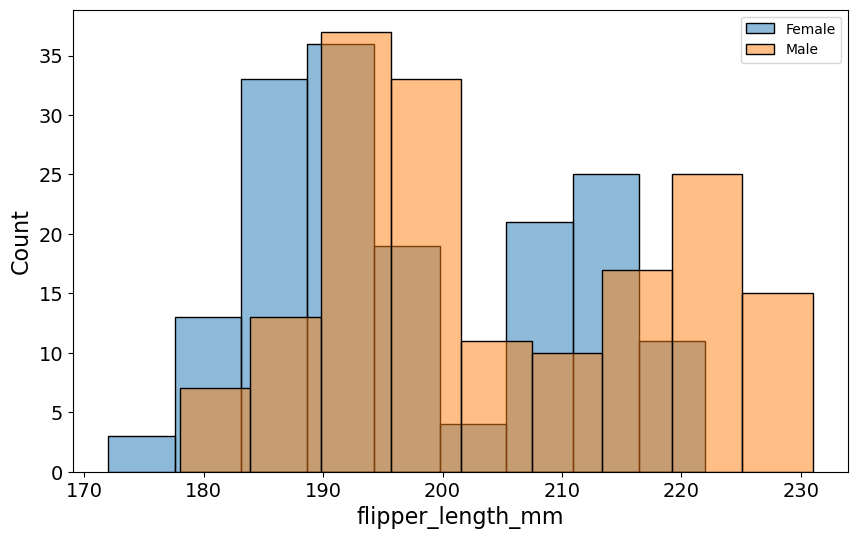

In [41]:
data_male = data[data["sex"] == "Male"]["flipper_length_mm"]
data_female = data[data["sex"] == "Female"]["flipper_length_mm"]

sns.histplot(data=data_female, label = "Female", alpha=0.5)
sns.histplot(data=data_male, label = "Male", alpha = 0.5)

plt.legend()
plt.show()

# Seaborn ile Histogram


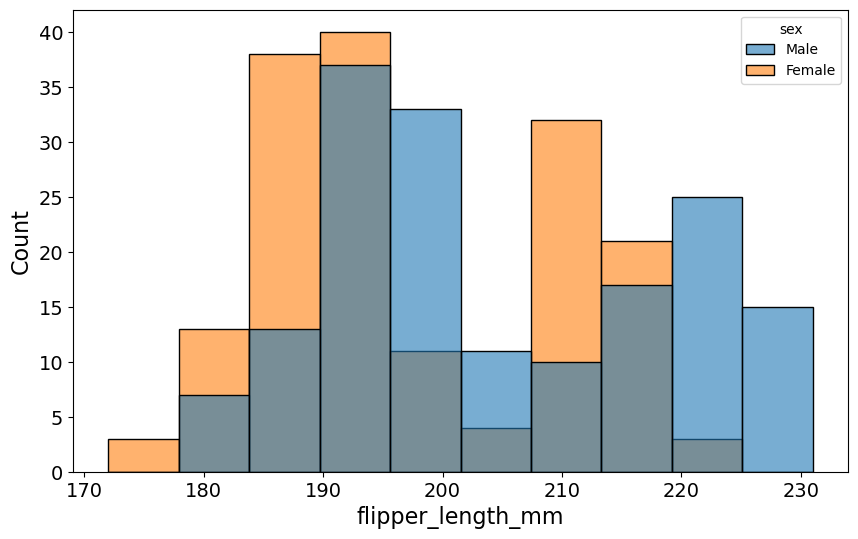

In [42]:
sns.histplot(data= data,
            x= "flipper_length_mm",
            hue= "sex",
            alpha= 0.6)
plt.show()

# Seaborn ile Scatterplot


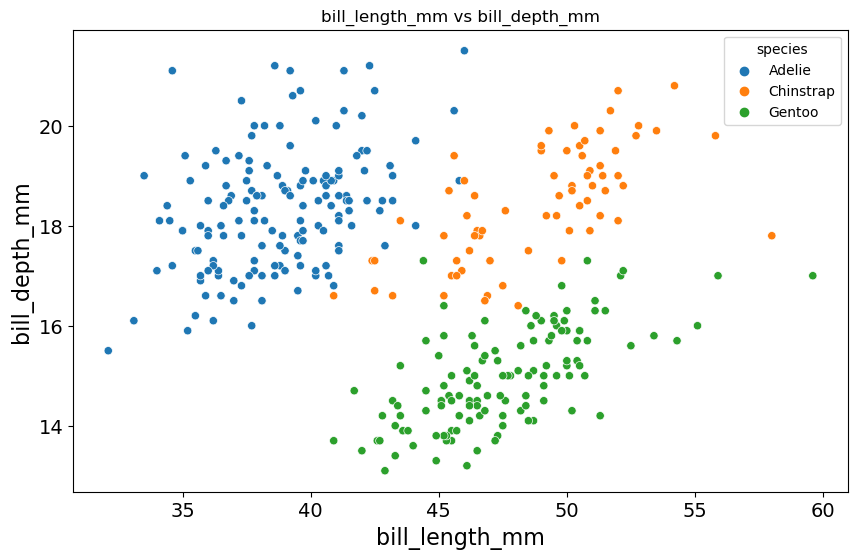

In [43]:
sns.scatterplot(data= data,
               x= "bill_length_mm",
               y= "bill_depth_mm",
               hue= "species")
plt.title("bill_length_mm vs bill_depth_mm")
plt.show()

# Seaborn ile Barplot


In [46]:
grouped_data = data.groupby(["sex", "species"])["body_mass_g"].mean().reset_index()
grouped_data

,sex,species,body_mass_g
0,Female,Adelie,3368.835616
1,Female,Chinstrap,3527.205882
2,Female,Gentoo,4679.741379
3,Male,Adelie,4043.493151
4,Male,Chinstrap,3938.970588
5,Male,Gentoo,5484.836066


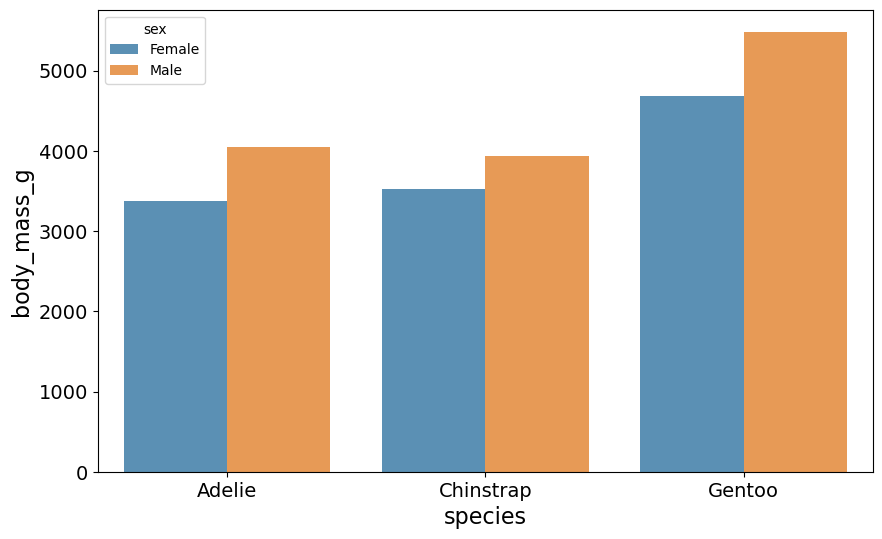

In [53]:
sns.barplot(data= grouped_data,
            x= "species", y= "body_mass_g",
            hue= "sex", alpha= 0.8
           )
plt.show()

# Subplot Oluşturma


## plt.subplots


(<Figure size 1600x1200 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

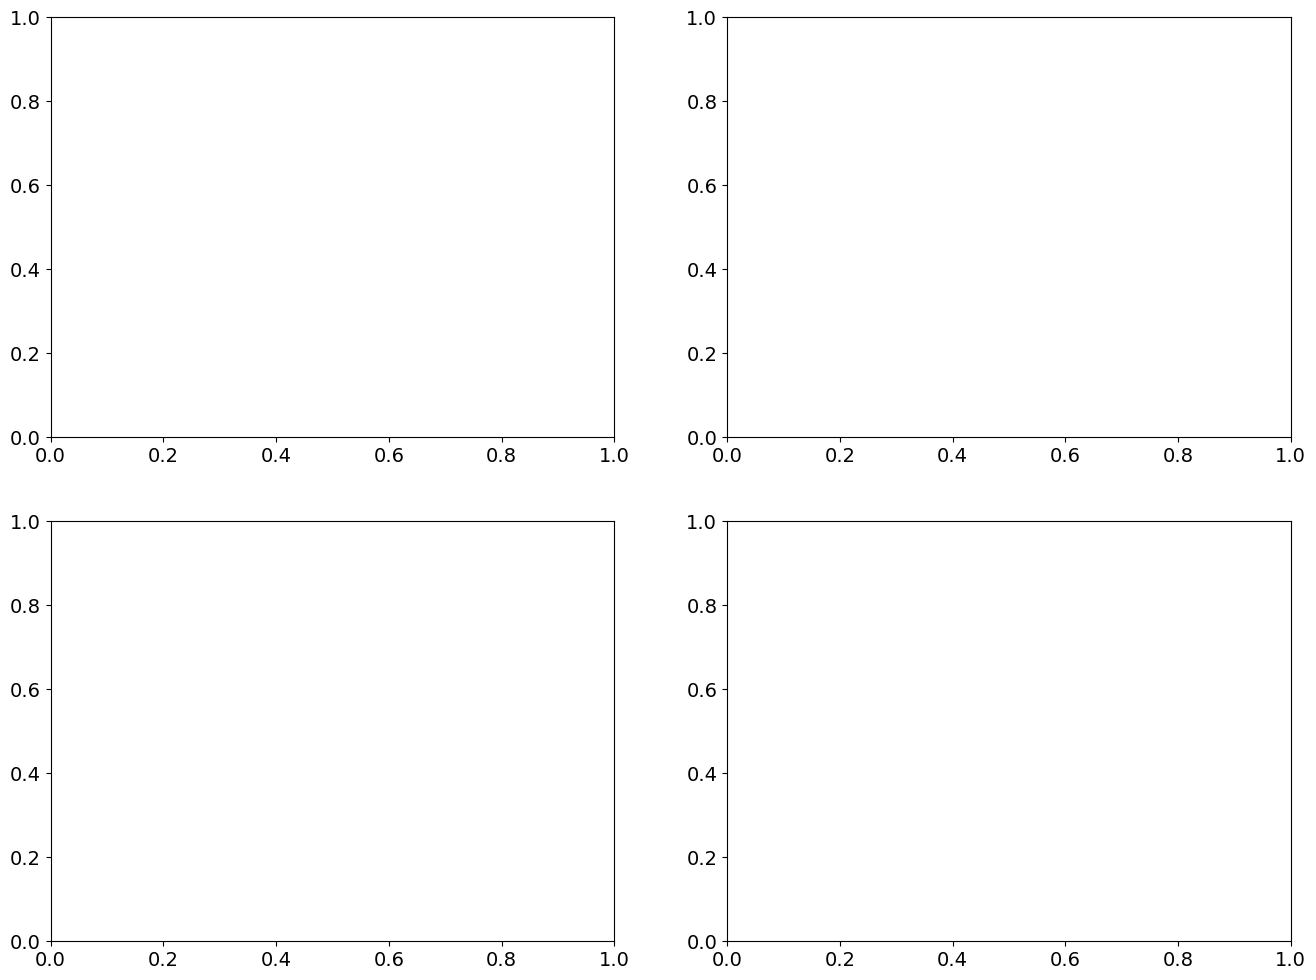

In [57]:
plt.subplots(2,2, figsize= (16,12))

In [13]:
#Soru1: Türlerin (species), body_mass_g özelliğine bakarak bir boxplot çiziniz ve subplot içine ekleyiniz.
#x = species, y = body_mass_g


#Soru2: bill_length_mm sütununu bir histogram olarak subplot içinde plot ediniz. "species"'e göre ayrılsın.
#hue= ..

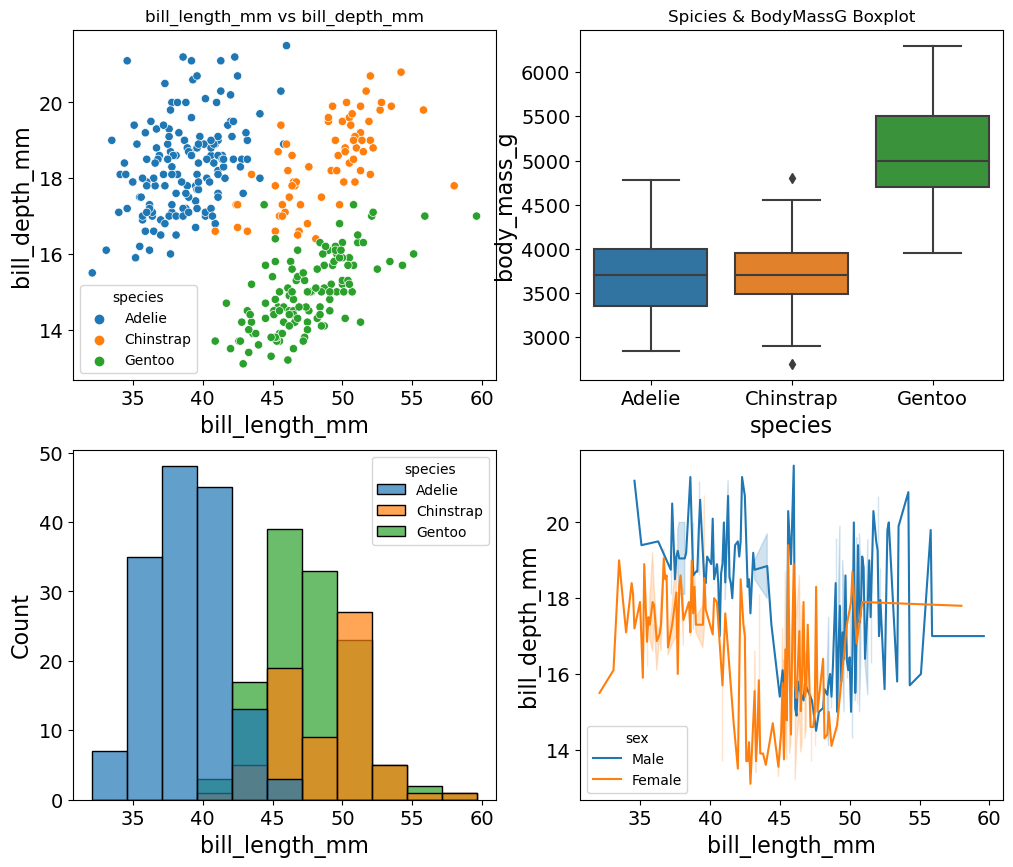

In [65]:
fig, axes = plt.subplots(2, 2, figsize= (12, 10)) # fig, axes eğer subplot yapıyorsak bunu yazmak önemli
#grafiklerin içine de ax = axes[...] metoduyla hangi grafiğe yazdıracağımızı söyleriz
# 1. grafik
sns.scatterplot(data= data,
               x= "bill_length_mm",
               y= "bill_depth_mm",
               hue= "species",
               ax= axes[0,0])


# soru1
#2. grafik
sns.boxplot(data = data, x= "species", y= "body_mass_g", ax= axes[0,1])

#soru2 
#3. grafik
sns.histplot(data= data,
           x= "bill_length_mm",
           hue= "species",
           alpha= 0.7, 
           ax= axes[1,0])
sns.lineplot(data= data,
            x = "bill_length_mm",
            y= "bill_depth_mm",
            hue= "sex",
            ax= axes[1,1]) #


axes[0,0].set_title("bill_length_mm vs bill_depth_mm") #### başlık koymak.
axes[0, 1].set_title("Spicies & BodyMassG Boxplot")

plt.show()

## plt.subplot()

<Axes: >

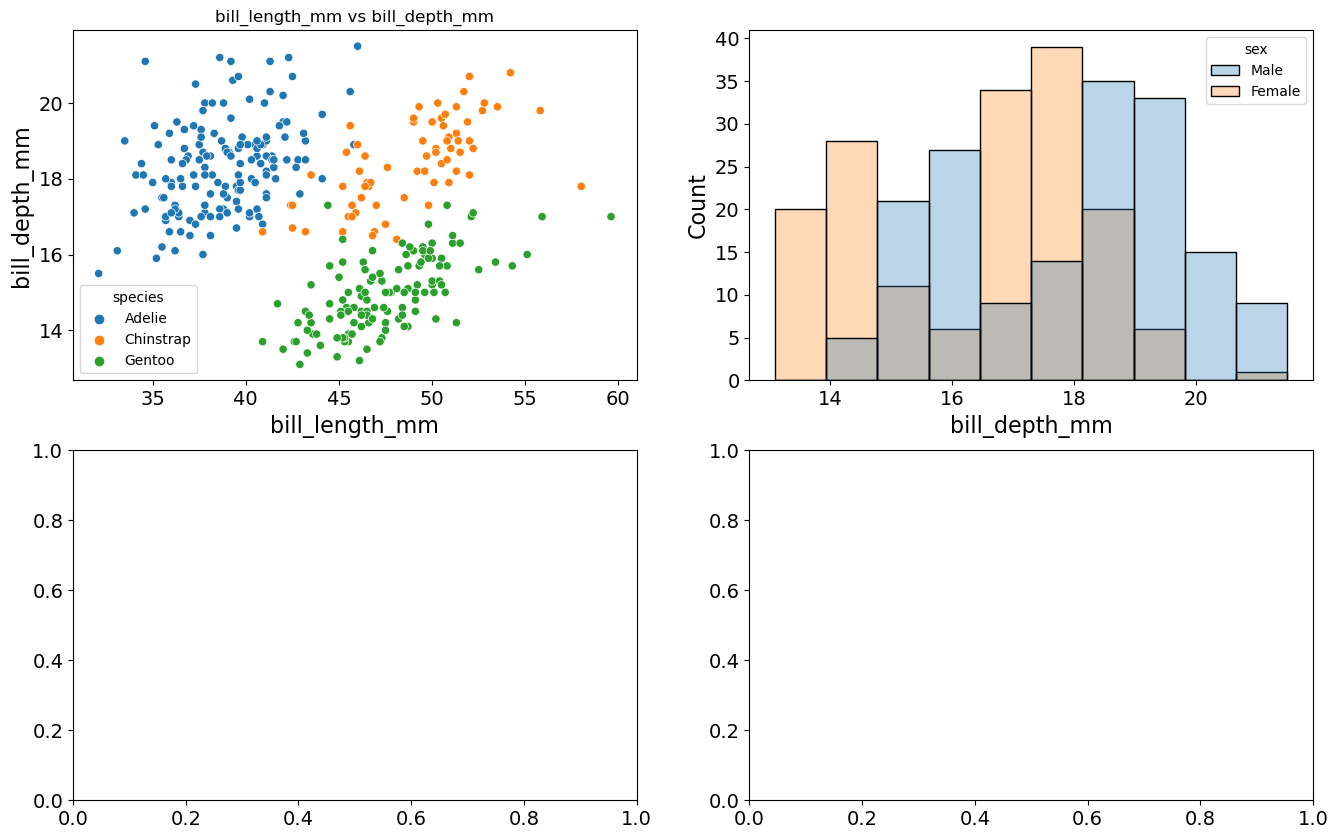

In [77]:
plt.figure(figsize= (16,10))
plt.subplot(2,2,1)
sns.scatterplot(data= data,
               x = "bill_length_mm",
               y= "bill_depth_mm",
               hue= "species")
plt.title("bill_length_mm vs bill_depth_mm")
plt.subplot(2,2,2)
plt.subplot(2, 2, 2)
sns.histplot(
    data=data,
    x = "bill_depth_mm",
    hue="sex", alpha=0.3
)
plt.subplot(2,2,3)
plt.subplot(2,2,4)

# Colormap ekleme


In [78]:
grouped_data = data.groupby(["species"])["body_mass_g"].mean()
grouped_data

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

In [80]:
grouped_data.index

Index(['Adelie', 'Chinstrap', 'Gentoo'], dtype='object', name='species')

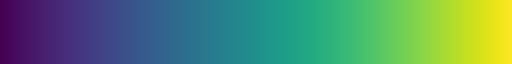

In [82]:
cmap = plt.get_cmap("viridis")
cmap

In [83]:
norm = plt.Normalize(grouped_data.min(), grouped_data.max())
norm

In [84]:
colors = cmap(norm(grouped_data.values))
colors

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.274952, 0.037752, 0.364543, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

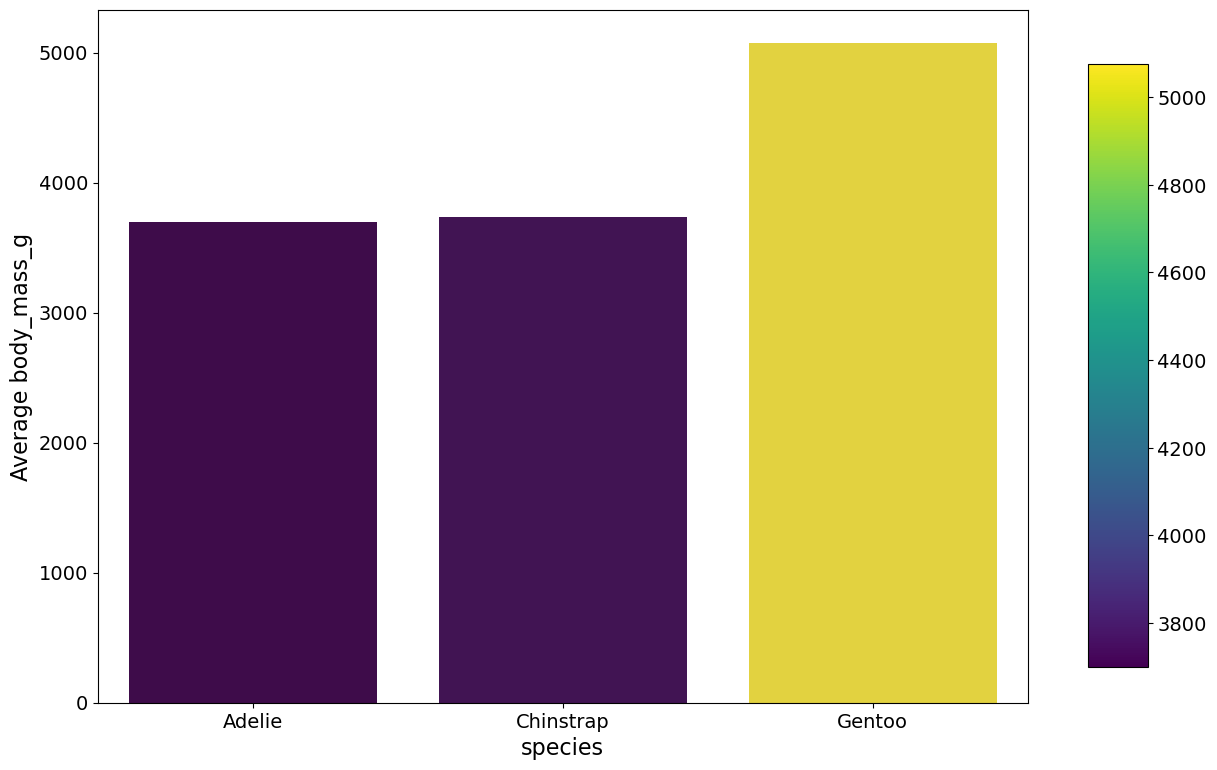

In [85]:
fig, ax = plt.subplots(figsize = (12, 9))

sns.barplot(x=grouped_data.index,
            y=grouped_data.values,
            palette=colors)

ax.set_ylabel("Average body_mass_g")

cax = fig.add_axes([0.95, 0.15, 0.05, 0.67])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm, cax=cax)

plt.show()